In [1]:
import numpy as np
import matplotlib.pyplot as plt

from igm_absorption import calc_transmission

In [2]:
restwav = np.linspace(350.,1800., 3000)

# Transmission function

Text(0, 0.5, 'Transmission')

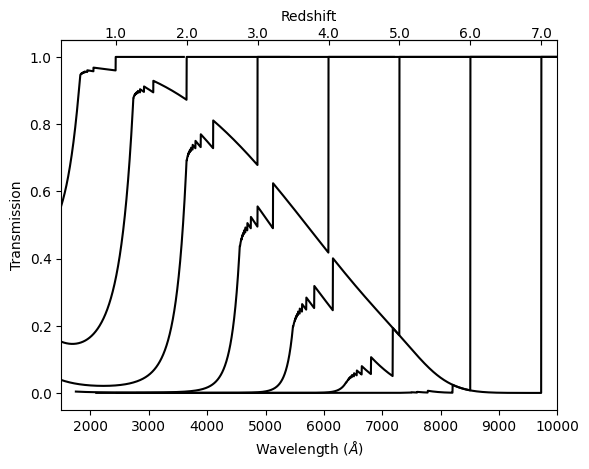

In [3]:
# plot transmission function
zrange = np.arange(1.,8.)

plt.figure()
for z in zrange:
    obswav = restwav*(1+z)
    trans = calc_transmission(z_s=z,l_obs=obswav)
    plt.plot(obswav, trans, color='black',lw=1.5)

ax = plt.gca()
#ax.set_yticks(fontsize=12)


g = lambda x: 1216.*(1.+x)
f = lambda x: x/1216.-1.

ax2 = ax.secondary_xaxis("top", functions=(f,g))
ax2.set_xticks(zrange)
ax2.tick_params(axis='x',direction='in',pad=0.)
ax2.set_xticklabels(zrange,)
ax2.set_xlabel('Redshift')

plt.xlim(1500,10000)
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Transmission')

# Specifying a discrete Lyman Limit system, instead of using the average

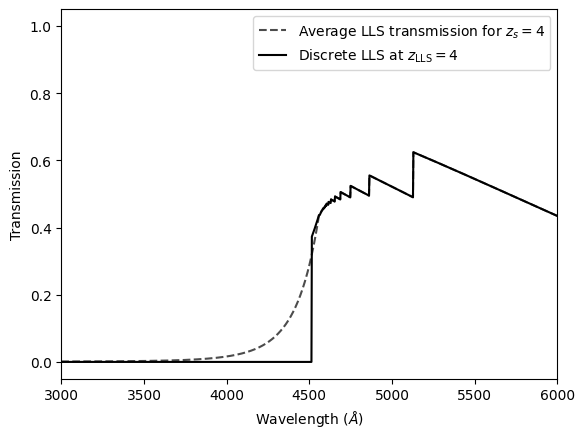

In [8]:
z_s = 4.
z_lls = 3.95
obswav = restwav*(1+z_s)
discrete_lls = calc_transmission(z_s, obswav, z_lls=z_lls)

#average for comparison
average_lls = calc_transmission(z_s, obswav)


plt.figure()
plt.plot(obswav, average_lls,color='black',alpha=0.7,ls='--', label='Average LLS transmission for $z_s=4$')
plt.plot(obswav, discrete_lls, color='black',label='Discrete LLS at $z_\\text{LLS}=4$' )

plt.xlim(3000,6000)
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Transmission')
plt.legend()




Text(0, 0.5, 'Transmission')

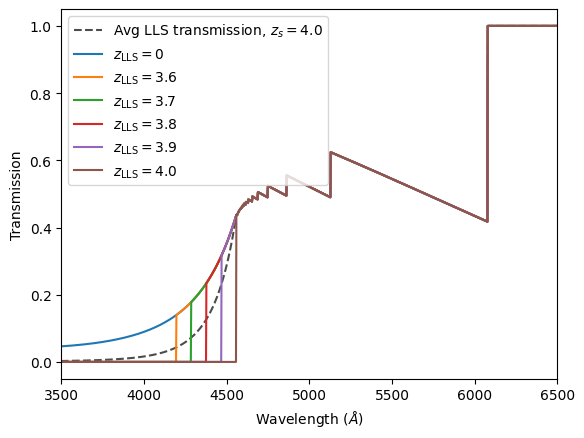

In [9]:

z_s=4.0
z_lls = [0, 3.6, 3.7, 3.8, 3.9, 4.]
obswav = restwav*(1+z_s)

average_lls_trans = calc_transmission(z_s=z_s, l_obs=obswav) #average for comparison

plt.figure()
plt.plot(obswav, average_lls_trans, color='black', ls='--',alpha=0.7, label='Avg LLS transmission, $z_s=$'+f'{z_s}')

for z in z_lls:
    lls_trans = calc_transmission(z_s=z_s, l_obs=obswav, z_lls=z) #lls at specified break
    plt.plot(obswav, lls_trans, lw=1.5, label='$z_\\text{LLS}=$'+f'{z}')

plt.legend()

plt.xlim(3500,6500)
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Transmission')

# Change nlines in Lyman series


Text(0, 0.5, 'Transmission')

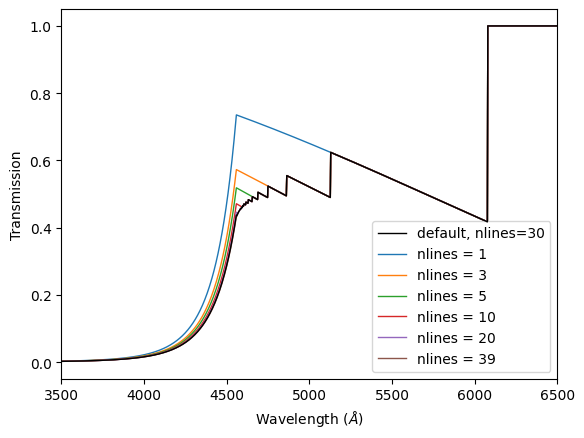

In [6]:
z_s=4.0
nlines = [1,3,5,10,20,39]
obswav = restwav*(1+z_s)

default_trans = calc_transmission(z_s=z_s, l_obs=obswav)

plt.figure()
plt.plot(obswav, default_trans, color='black', lw=1, label='default, nlines=30',zorder=10)

for n in nlines:
    nlines_trans = calc_transmission(z_s=z_s, l_obs=obswav, nlines=n) 
    plt.plot(obswav, nlines_trans, lw=1, label=f'nlines = {n}')

plt.legend(loc='lower right')

plt.xlim(3500,6500)
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Transmission')